In [69]:
import numpy as np
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imghdr
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.callbacks import EarlyStopping
import cv2

In [2]:
dataset='Smoker Detection.zip'
with ZipFile(dataset,'r') as zip:
    zip.extractall()

In [3]:
non_smoker_path='Smoker Detection/Non Smoker'
non_smoker_image_names=[]
for image in os.listdir(non_smoker_path):
    non_smoker_image_names.append(image)

In [4]:
non_smoker_image_names[:10]

['1 (1).jpeg',
 '1 (1).jpg',
 '1 (1).png',
 '1 (1).webp',
 '1 (10).jpeg',
 '1 (10).jpg',
 '1 (100).jpg',
 '1 (101).jpg',
 '1 (102).jpg',
 '1 (103).jpg']

In [5]:
smoker_path='Smoker Detection/Smoker'
smoker_image_names=[]
for image in os.listdir(smoker_path):
    smoker_image_names.append(image)

In [6]:
smoker_image_names[:10]

['1 (1).jpeg',
 '1 (1).jpg',
 '1 (10).jpeg',
 '1 (10).jpg',
 '1 (101).jpg',
 '1 (102).jpg',
 '1 (103).jpg',
 '1 (104).jpg',
 '1 (106).jpg',
 '1 (107).jpg']

In [7]:
non_smoker_images=[]
for image in non_smoker_image_names:
    full_path=non_smoker_path+'/'+image
    non_smoker_images.append(full_path)

In [8]:
non_smoker_images[:10]

['Smoker Detection/Non Smoker/1 (1).jpeg',
 'Smoker Detection/Non Smoker/1 (1).jpg',
 'Smoker Detection/Non Smoker/1 (1).png',
 'Smoker Detection/Non Smoker/1 (1).webp',
 'Smoker Detection/Non Smoker/1 (10).jpeg',
 'Smoker Detection/Non Smoker/1 (10).jpg',
 'Smoker Detection/Non Smoker/1 (100).jpg',
 'Smoker Detection/Non Smoker/1 (101).jpg',
 'Smoker Detection/Non Smoker/1 (102).jpg',
 'Smoker Detection/Non Smoker/1 (103).jpg']

In [9]:
smoker_images=[]
for image in smoker_image_names:
    full_path=smoker_path+'/'+image
    smoker_images.append(full_path)

In [10]:
smoker_images[:10]

['Smoker Detection/Smoker/1 (1).jpeg',
 'Smoker Detection/Smoker/1 (1).jpg',
 'Smoker Detection/Smoker/1 (10).jpeg',
 'Smoker Detection/Smoker/1 (10).jpg',
 'Smoker Detection/Smoker/1 (101).jpg',
 'Smoker Detection/Smoker/1 (102).jpg',
 'Smoker Detection/Smoker/1 (103).jpg',
 'Smoker Detection/Smoker/1 (104).jpg',
 'Smoker Detection/Smoker/1 (106).jpg',
 'Smoker Detection/Smoker/1 (107).jpg']

In [11]:
print('Number of non smoker images: ',len(non_smoker_images))
print('Number of smoker images: ',len(smoker_images))
print('Total number of images: ',len(non_smoker_images)+len(smoker_images))

Number of non smoker images:  6686
Number of smoker images:  6571
Total number of images:  13257


In [12]:
image_ext=['png','jpeg','jpg']
non_smoker_images_final=[]
for image in non_smoker_images:
    if imghdr.what(image) in image_ext:
        non_smoker_images_final.append(image)

In [13]:
non_smoker_images_final[:10]

['Smoker Detection/Non Smoker/1 (1).jpeg',
 'Smoker Detection/Non Smoker/1 (1).jpg',
 'Smoker Detection/Non Smoker/1 (1).png',
 'Smoker Detection/Non Smoker/1 (10).jpeg',
 'Smoker Detection/Non Smoker/1 (10).jpg',
 'Smoker Detection/Non Smoker/1 (100).jpg',
 'Smoker Detection/Non Smoker/1 (101).jpg',
 'Smoker Detection/Non Smoker/1 (102).jpg',
 'Smoker Detection/Non Smoker/1 (103).jpg',
 'Smoker Detection/Non Smoker/1 (104).jpg']

In [14]:
smoker_images_final=[]
for image in smoker_images:
    if imghdr.what(image) in image_ext:
        smoker_images_final.append(image)

In [15]:
print('Number of non smoker images: ',len(non_smoker_images_final))
print('Number of smoker images: ',len(smoker_images_final))
print('Total number of images: ',len(non_smoker_images_final)+len(smoker_images_final))

Number of non smoker images:  6666
Number of smoker images:  6527
Total number of images:  13193


In [16]:
non_smoker_labels=[0]*len(non_smoker_images_final)
smoker_labels=[1]*len(smoker_images_final)

In [17]:
non_smoker_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [18]:
len(non_smoker_labels)

6666

In [19]:
smoker_labels[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [20]:
len(smoker_labels)

6527

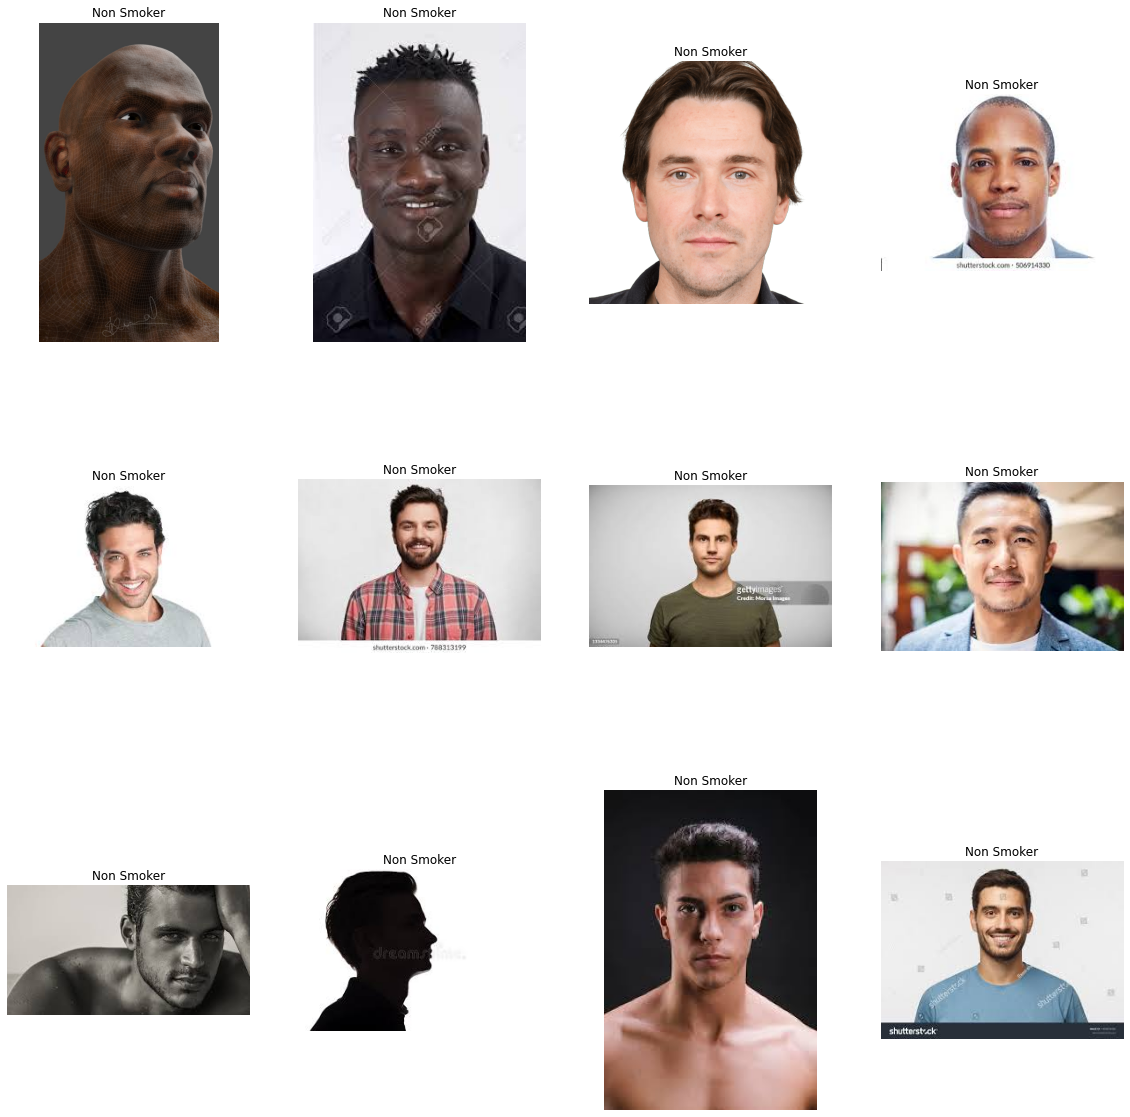

In [21]:
plt.figure(figsize=(20,20))
for i in range(0,12):
    ax=plt.subplot(3,4,i+1)
    img=mpimg.imread(non_smoker_images_final[i])
    plt.imshow(img)
    plt.title('Non Smoker')
    plt.axis('off')

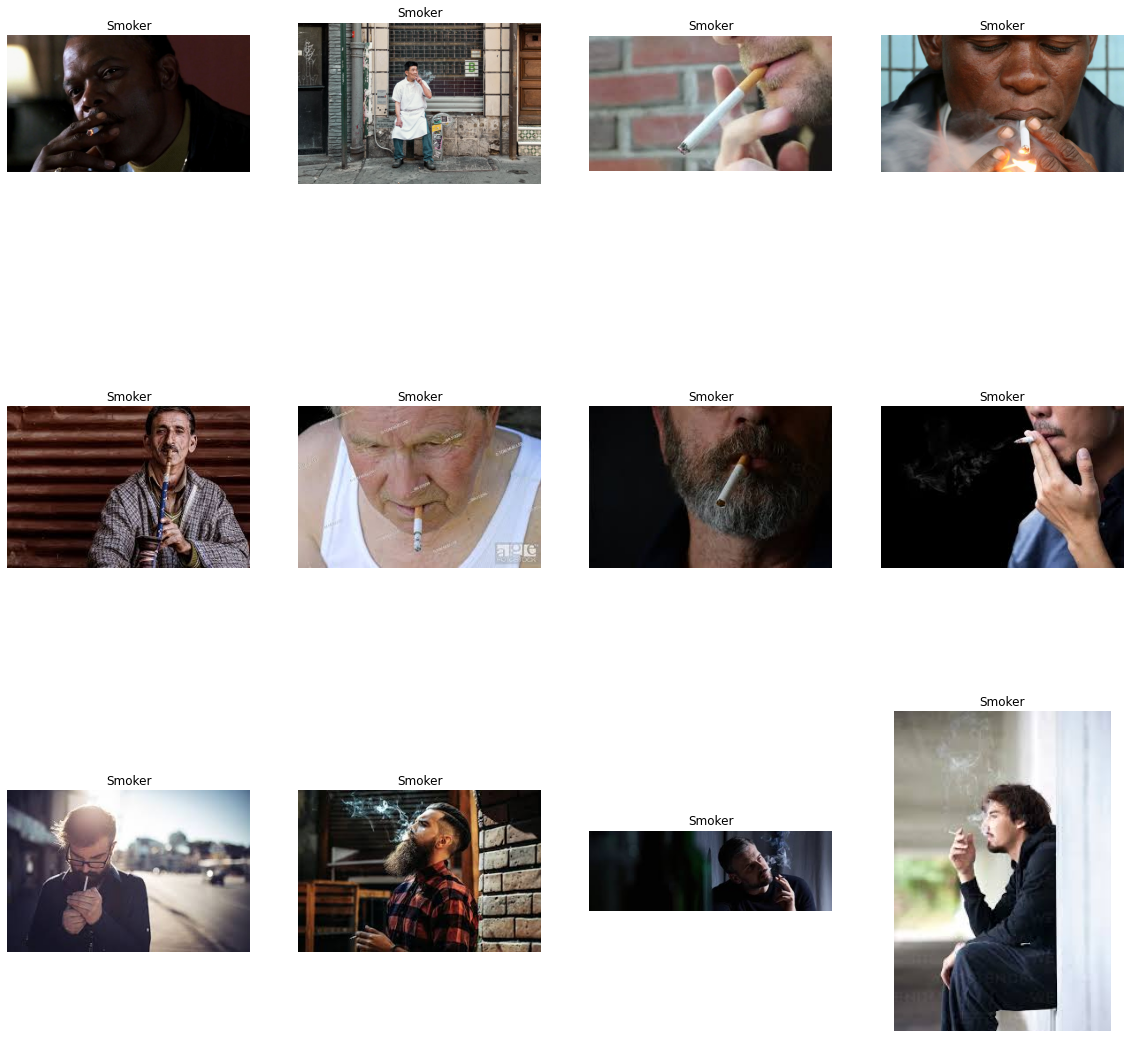

In [22]:
plt.figure(figsize=(20,20))
for i in range(0,12):
    ax=plt.subplot(3,4,i+1)
    img=mpimg.imread(smoker_images_final[i])
    plt.imshow(img)
    plt.title('Smoker')
    plt.axis('off')

In [23]:
data=[]

In [24]:
for image_file in non_smoker_images_final:
    image=Image.open(image_file)
    image=image.resize((80,80))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [25]:
for image_file in smoker_images_final:
    image=Image.open(image_file)
    image=image.resize((80,80))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [26]:
type(data)

list

In [27]:
len(data)

13193

In [28]:
data[0]

array([[[ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       [[ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       [[ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 68,  68,  68],
        [ 68,  68,  68],
        [ 68,  68,  68]],

       ...,

       [[ 43,  25,  13],
        [ 40,  22,  10],
        [ 40,  23,  10],
        ...,
        [114,  90,  75],
        [109,  84,  67],
        [116,  94,  79]],

       [[ 38,  20,   8],
        [ 40,  21,   9],
        [ 42,  25,  13],
        ...,
        [111,  82,  64],
        [106,  78,  60],
        [101,  73,  54]],

       [[ 42,  22,   9],
        [ 46,  26,  13],
        [ 48,  28,  15],
        ...,
        [114,  85,  66],
        [116,  87,  70],
        [113,  85,  68]]

In [29]:
type(data[0])

numpy.ndarray

In [30]:
data[0].shape

(80, 80, 3)

In [31]:
data[1].shape

(80, 80, 3)

In [32]:
type(data)

list

In [33]:
all_labels=non_smoker_labels+smoker_labels

In [34]:
type(all_labels)

list

In [35]:
X=np.array(data)
y=np.array(all_labels)

In [36]:
X.shape

(13193, 80, 80, 3)

In [37]:
y.shape

(13193,)

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101,stratify=y,shuffle=True)

In [39]:
X_train.shape

(10554, 80, 80, 3)

In [40]:
y_train.shape

(10554,)

In [41]:
X_test.shape

(2639, 80, 80, 3)

In [42]:
y_test.shape

(2639,)

In [43]:
X_train[0]

array([[[25,  7,  5],
        [25,  7,  5],
        [25,  7,  5],
        ...,
        [36, 17,  3],
        [37, 18,  4],
        [38, 19,  6]],

       [[25,  7,  5],
        [25,  7,  5],
        [25,  7,  5],
        ...,
        [38, 19,  5],
        [39, 20,  6],
        [40, 21,  8]],

       [[25,  7,  5],
        [25,  7,  5],
        [25,  7,  5],
        ...,
        [38, 19,  5],
        [40, 21,  7],
        [41, 22,  9]],

       ...,

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]]], dtype=uint8)

In [44]:
X_train_scaled=X_train/255

In [45]:
X_test_scaled=X_test/255

In [46]:
X_train_scaled[0]

array([[[0.09803922, 0.02745098, 0.01960784],
        [0.09803922, 0.02745098, 0.01960784],
        [0.09803922, 0.02745098, 0.01960784],
        ...,
        [0.14117647, 0.06666667, 0.01176471],
        [0.14509804, 0.07058824, 0.01568627],
        [0.14901961, 0.0745098 , 0.02352941]],

       [[0.09803922, 0.02745098, 0.01960784],
        [0.09803922, 0.02745098, 0.01960784],
        [0.09803922, 0.02745098, 0.01960784],
        ...,
        [0.14901961, 0.0745098 , 0.01960784],
        [0.15294118, 0.07843137, 0.02352941],
        [0.15686275, 0.08235294, 0.03137255]],

       [[0.09803922, 0.02745098, 0.01960784],
        [0.09803922, 0.02745098, 0.01960784],
        [0.09803922, 0.02745098, 0.01960784],
        ...,
        [0.14901961, 0.0745098 , 0.01960784],
        [0.15686275, 0.08235294, 0.02745098],
        [0.16078431, 0.08627451, 0.03529412]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

In [47]:
model=Sequential()

In [48]:
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(80,80,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [49]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [50]:
early_stopping=EarlyStopping(monitor='val_loss')

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 80, 80, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 40, 40, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,276,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,641 (12.61 MB)

 Trainable params: 3,304,641 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history=model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=20,callbacks=[early_stopping])

Epoch 1/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 106s 171ms/step - accuracy: 0.6695 - loss: 0.6150 - val_accuracy: 0.7822 - val_loss: 0.4801
Epoch 2/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 47s 158ms/step - accuracy: 0.7523 - loss: 0.4990 - val_accuracy: 0.8040 - val_loss: 0.4356
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 46s 155ms/step - accuracy: 0.8029 - loss: 0.4191 - val_accuracy: 0.8295 - val_loss: 0.3996
Epoch 4/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 46s 155ms/step - accuracy: 0.8440 - loss: 0.3516 - val_accuracy: 0.8068 - val_loss: 0.4272


In [53]:
model.evaluate(X_test_scaled,y_test)

83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.7956 - loss: 0.4289


[0.42815926671028137, 0.8063660264015198]

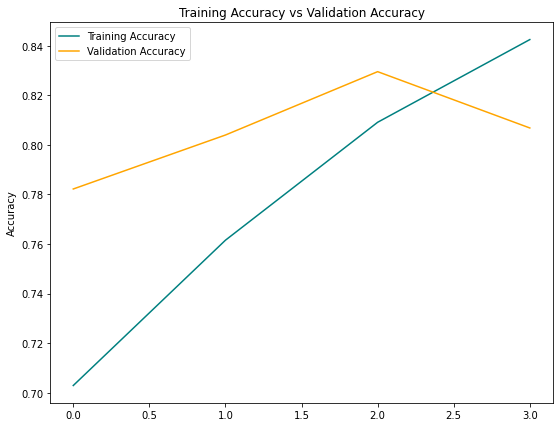

In [54]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'],color='teal',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

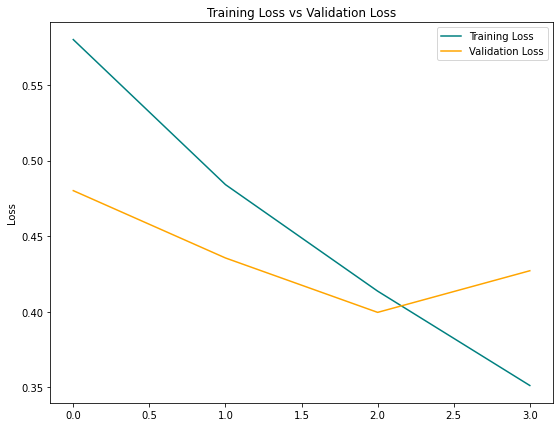

In [55]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'],color='teal',label='Training Loss')
plt.plot(history.history['val_loss'],color='orange',label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
def pre(path):
    input_image=cv2.imread(path)
    resized_image=cv2.resize(input_image,(80,80))
    resized_image=np.array(resized_image)
    scaled_image=resized_image/255
    reshaped_image=np.reshape(scaled_image,[1,80,80,3])
    y_predict=model.predict(reshaped_image)
    y_pred=np.where(y_predict>0.5,1,0)
    if y_pred==0:
        print('The person in the image is not smoking')
    else:
        print('The preson in the image is smoking')
    plt.imshow(cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The preson in the image is smoking


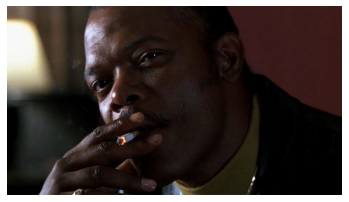

In [63]:
pre('Smoker Detection/Smoker/1 (1).jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
The person in the image is not smoking


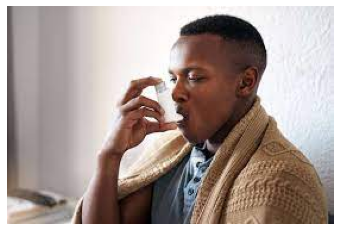

In [64]:
pre('Smoker Detection/Non Smoker/30 (788).jpg')